In [86]:
# packages

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os

from mtist import mtist_utils as mu
from mtist import infer_mtist as im
calculate_es_score = im.calculate_es_score

In [99]:
# get calculated scores for linear regression, and its regularized versions (with cross-validation), for geometric averaging

# scores1 = pd.read_csv("mtist_datasets/default_inference_result/default_es_scores.csv", index_col=0)
# scores2 = pd.read_csv("mtist_datasets/inference_result2/es_scores.csv", index_col=0)
# scores3 = pd.read_csv("mtist_datasets/inference_result_infer_from_did_geom_mean/es_scores.csv", index_col=0)

scores1 = pd.read_csv("mtist_datasets/elasticnet_CV_inference_result/elasticnet_CV_es_scores.csv", index_col=0)
scores2 = pd.read_csv("mtist_datasets/inference_result_infer_from_did_elasticnet_cv_geom_mean/es_scores.csv", index_col=0)

In [100]:
# get number of species of each dataset and add it to score dataframes

n_sp_list = []
for i in range(len(scores1)):
    n_sp_list.append(open(f"mtist_datasets/dataset_{i}.csv", "r").readlines()[0].count("species_"))

scores1["n_sp"] = n_sp_list
scores2["n_sp"] = n_sp_list
scores3["n_sp"] = n_sp_list

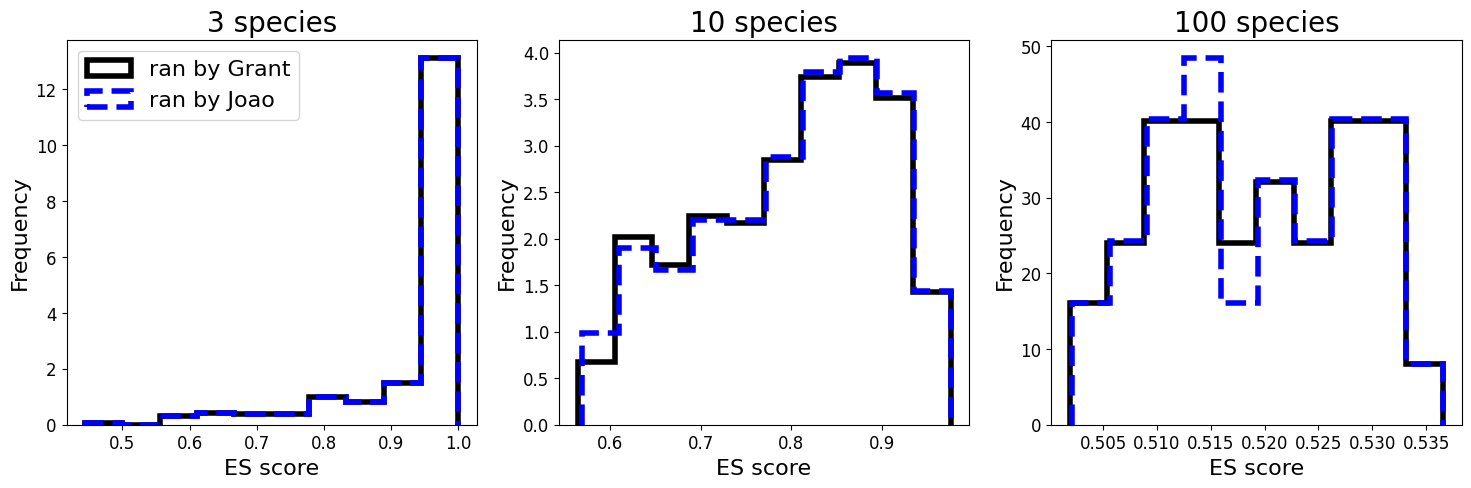

In [101]:
plt.subplots(1, 3, figsize=(18,5))
for i, n_sp in enumerate(np.sort(scores1["n_sp"].unique())):
    plt.subplot(1, 3, i+1)
    plt.hist(scores1[scores1["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=4, color="k", density=True, label="ran by Grant")
    plt.hist(scores2[scores2["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=4, color="b", ls="--", density=True, label="ran by Joao")
    # plt.hist(scores3[scores3["n_sp"]==n_sp]["raw"], 10, histtype="step", lw=4, color="r", ls="dotted", density=True, label="ran by Joao 2")
    if i==0:
        plt.legend(loc="upper left", fontsize=16)
    plt.title(f"{n_sp} species", fontsize=20)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel("ES score", fontsize=16)
    plt.ylabel("Frequency", fontsize=16)
plt.show()